__Importing Packages and Loading Dataset__

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load dataset and set headers (as named on uci irvine website)
headers = ['age',
            'workclass',
            'fnlwgt',
            'education',
            'education-num',
            'marital-status',
            'occupation',
            'relationship',
            'race',
            'sex',
            'capital-gain',
            'capital-loss',
            'hours-per-week',
            'native-country',
            'above-50k']
adult_dataset = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                   names=headers, index_col=False, na_values=' ?')

In [3]:
adult_dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,above-50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
print(adult_dataset.shape)

(32561, 15)


We will now check for null values, and drop them if there are any.

In [5]:
adult_dataset.dropna(inplace=True)

In [6]:
print(adult_dataset.shape)

(30162, 15)


As we can see, there were some null values in the dataset that we have now dropped, leaving us with 30162 rows. We will now check the types of the features to see if any are categorical.

In [7]:
adult_dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
above-50k         object
dtype: object

Because there are categorical features present, we will convert these to numerical values using dummy variables. 

In [8]:
# create dummy variables 
adult_dataset = pd.get_dummies(adult_dataset)

In [9]:
adult_dataset

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,above-50k_ <=50K,above-50k_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,37,284582,14,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
6,49,160187,5,0,0,16,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7,52,209642,9,0,0,45,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8,31,45781,14,14084,0,50,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
9,42,159449,13,5178,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


Because converting the categorical values into numerical has produced two seperate columns for income, we will simply drop one of the columns so we are left with the income above 50k column.

In [10]:
# remove extra classification column 
adult_dataset = adult_dataset.drop(columns=['above-50k_ <=50K'])

In [11]:
adult_dataset

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,above-50k_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,37,284582,14,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6,49,160187,5,0,0,16,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,52,209642,9,0,0,45,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8,31,45781,14,14084,0,50,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
9,42,159449,13,5178,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [12]:
print(adult_dataset.shape)

(30162, 105)


__Helper Functions__

In [13]:
# function to draw heatmap for linear svm
def draw_heatmap_linear(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [14]:
# function to draw heatmap for rbf svm
def draw_heatmap_RBF(acc, acc_desc, gamma_list, C_list):
    plt.figure(figsize = (5,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', 
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = '$\gamma$', ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$ and $\gamma$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show() 

In [15]:
# function to draw heatmap for k nearest neighbors
def draw_heatmap_KNN(acc, acc_desc, k_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=k_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$k$')
    plt.title(acc_desc + ' w.r.t $k$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [16]:
# function to draw heatmap for decision tree
def draw_heatmap_decisionTree(acc, acc_desc, depth_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=depth_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='depth')
    plt.title(acc_desc + ' w.r.t $depth$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [17]:
# function to draw heatmap for random forest
def draw_heatmap_randomForest(acc, acc_desc, f_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=f_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='features')
    plt.title(acc_desc + ' w.r.t $features$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [18]:
# function for linear svm
def linearSVM():
    # create the classifier and perform gridsearch to obtain an optimal C
    classifier = svm.SVC(kernel='linear')
    C_list = np.array([10**-3, 10**-2, 10**-1,10**0,10**1,10**2, 10**3]) # Different C to try.
    params = {"C": C_list}

    grid = GridSearchCV(classifier, params, return_train_score=True, n_jobs = -1)
    grid.fit(X_train_val,Y_train_val)
    
    # draw heatmaps for the training and validation results 
    train_acc = grid.cv_results_['mean_train_score']
    draw_heatmap_linear(train_acc.reshape(-1,1), 'linear svm train accuracy', C_list)

    val_acc = grid.cv_results_['mean_test_score']
    draw_heatmap_linear(val_acc.reshape(-1,1), 'linear svm val accuracy', C_list)
    
    # get the training and validation accuracy associated with the best C
    for i,val in enumerate(C_list):
        if val == grid.best_params_['C']:
            best_train_acc = train_acc[i]
            best_val_acc = val_acc[i]
    
    # train the classifier on the most optimal C to get the most optimal test accuracy
    op_classifier = svm.SVC(kernel = 'linear', C = grid.best_params_['C'] )
    op_classifier.fit(X_train_val, Y_train_val)
    test_acc = op_classifier.score(X_test, Y_test)
    return test_acc, best_train_acc, best_val_acc, grid.best_params_['C']

In [19]:
# function for rbf svm
def rbfSVM():
    # create the classifier and perform gridsearch to obtain an optimal C and gamme
    classifier = svm.SVC(kernel = 'rbf')
    gamma_list     = np.array([0.001,0.005,0.01,0.05,0.1,0.5,1,2]) # Different gamma to try.
    C_list = np.array([10**-3, 10**-2, 10**-1,10**0,10**1,10**2,10**3]) # Different C to try.
    param_grid = dict(gamma=gamma_list, C=C_list)
    
    grid = GridSearchCV(estimator = classifier, param_grid = param_grid, return_train_score=True, n_jobs = -1)
    grid.fit(X_train_val,Y_train_val)

    # draw heatmaps for the training and validation results
    train_acc = grid.cv_results_['mean_train_score'].reshape(7,8)
    draw_heatmap_RBF(train_acc, 'rbf svm train accuracy', gamma_list, C_list)

    val_acc = grid.cv_results_['mean_test_score'].reshape(7,8)
    draw_heatmap_RBF(val_acc, 'rbf svm val accuracy',gamma_list, C_list)
    
    # get the training and validation accuracy associated with the best C and gamma
    for i,val in enumerate(C_list):
        for j, val2 in enumerate(gamma_list):
            if ((val == grid.best_params_['C']) and (val2 == grid.best_params_['gamma'])):
                best_train_acc = train_acc[i,j]
                best_val_acc = val_acc[i,j]
    
    # train the classifier on the most optimal C and gamma to get the most optimal test accuracy 
    op_classifier = svm.SVC(kernel = 'rbf', C = grid.best_params_['C'], gamma = grid.best_params_['gamma'])
    op_classifier.fit(X_train_val, Y_train_val)
    test_acc = op_classifier.score(X_test, Y_test)
    return test_acc, best_train_acc, best_val_acc, grid.best_params_['C'], grid.best_params_['gamma']

In [20]:
# function for k nearest neighbors 
def knn():
    # create the classifier and perform gridsearch to obtain an optimal number of neighbors
    k_list = [1,2,3,4,5,6,7,8,9,10]
    params = {"n_neighbors": k_list}
    classifier = KNeighborsClassifier()
    grid = GridSearchCV(classifier, params, return_train_score=True, n_jobs = -1)
    grid.fit(X_train_val, Y_train_val)

    # draw heatmaps for the training and validation results
    train_acc = grid.cv_results_['mean_train_score']
    draw_heatmap_KNN(train_acc.reshape(10,1), 'knn train accuracy', k_list)
    
    val_acc = grid.cv_results_['mean_test_score']
    draw_heatmap_KNN(val_acc.reshape(10,1), 'knn val accuracy', k_list)
    
    # get the training and validation accuracy associated with the best number of neighbors
    for i,val in enumerate(k_list):
        if val == grid.best_params_['n_neighbors']:
            best_train_acc = train_acc[i]
            best_val_acc = val_acc[i]
    
    # train the classifier on the most optimal number of neighbors to get the most optimal test accuracy
    op_classifier = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
    op_classifier.fit(X_train_val,Y_train_val)
    test_acc = op_classifier.score(X_test,Y_test)
    return test_acc, best_train_acc, best_val_acc, grid.best_params_['n_neighbors']

In [21]:
# function for decision tree
def decisionTree():
    # create the classifier and perform gridsearch to obtain an optimal  depth
    classifier = tree.DecisionTreeClassifier()
    D_list = [1,2,3,4,5]
    param_grid = {
                  "max_depth": D_list,
                  "criterion": ["entropy"]
                 }
    grid = GridSearchCV(classifier, param_grid, return_train_score = True, n_jobs = -1)
    grid.fit(X_train_val, Y_train_val)

    # draw heatmaps for the training and validation results
    train_acc = grid.cv_results_['mean_train_score']
    draw_heatmap_decisionTree(train_acc.reshape(-1,1), 'decision tree train accuracy', D_list)

    val_acc = grid.cv_results_['mean_test_score']
    draw_heatmap_decisionTree(val_acc.reshape(-1,1), 'decision tree val accuracy', D_list)
    
    # get the training and validation accuracy associated with the best depth
    for i,val in enumerate(D_list):
        if val == grid.best_params_['max_depth']:
            best_train_acc = train_acc[i]
            best_val_acc = val_acc[i]
    
    # train the classifier on the most optimal depth to get the most optimal test accuracy
    op_classifier = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = grid.best_params_['max_depth'])
    op_classifier.fit(X_train_val, Y_train_val)
    test_acc = op_classifier.score(X_test, Y_test)
    return test_acc, best_train_acc, best_val_acc, grid.best_params_['max_depth']

In [22]:
# function for random forest
def randomForest():
    # create the classifier and perform gridsearch to obtain an optimal number of features
    f_list = [1,2,4,6,8,12,16, 20]
    params = {"max_features": f_list}
    classifier = RandomForestClassifier(n_estimators = 1024)
    grid = GridSearchCV(classifier, params, return_train_score=True, n_jobs = -1)
    grid.fit(X_train_val, Y_train_val)

    # draw heatmaps for the training and validation results
    train_acc = grid.cv_results_['mean_train_score']
    draw_heatmap_randomForest(train_acc.reshape(8,1), 'random forest train accuracy', f_list)
    
    val_acc = grid.cv_results_['mean_test_score']
    draw_heatmap_randomForest(val_acc.reshape(8,1), 'random forest val accuracy', f_list)
    
    # get the training and validation accuracy associated with the best number of features
    for i,val in enumerate(f_list):
        if val == grid.best_params_['max_features']:
            best_train_acc = train_acc[i]
            best_val_acc = val_acc[i]
    
    # train the classifier on the most optimal number of features to get the most optimal test accuracy
    op_classifier = RandomForestClassifier(max_features=grid.best_params_['max_features'])
    op_classifier.fit(X_train_val,Y_train_val)
    test_acc = op_classifier.score(X_test,Y_test)
    return test_acc, best_train_acc, best_val_acc, grid.best_params_['max_features']

__Heatmaps and Final Reults__

Train Partition:  0.8


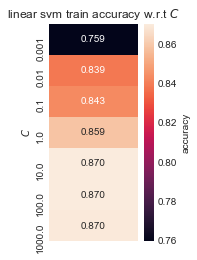

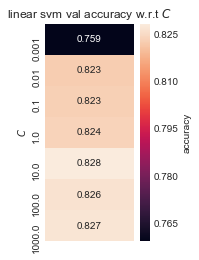

Test Accuracy for Linear SVM =  0.835


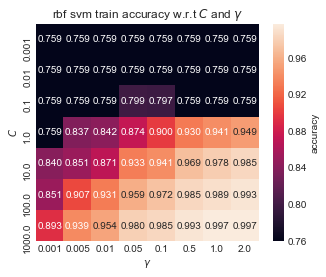

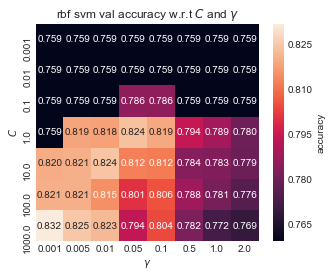

Test Accuracy for RBF SVM =  0.85


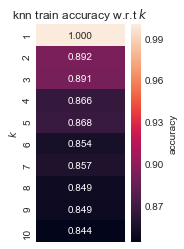

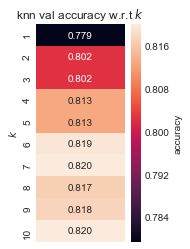

Test Accuracy for K Nearest Neighbors =  0.8175


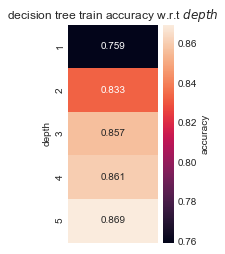

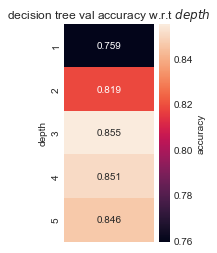

Test Accuracy for Decision Tree =  0.84


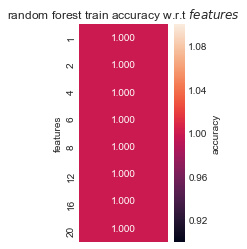

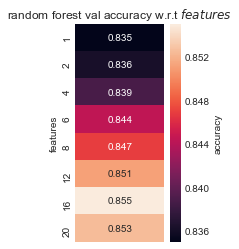

Test Accuracy for Random Forest =  0.8325


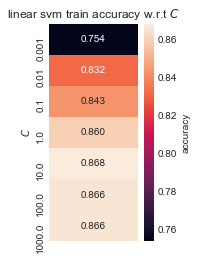

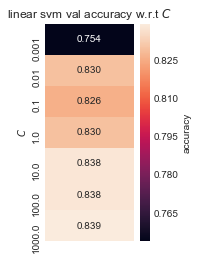

Test Accuracy for Linear SVM =  0.835


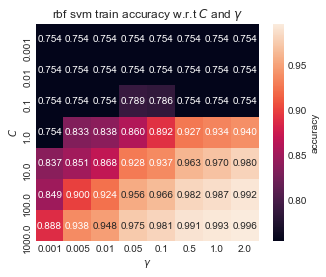

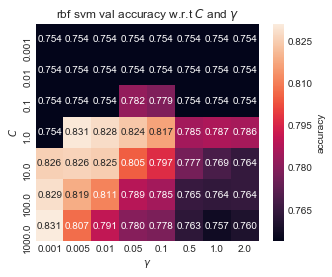

Test Accuracy for RBF SVM =  0.8525


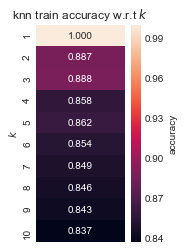

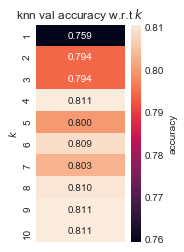

Test Accuracy for K Nearest Neighbors =  0.8225


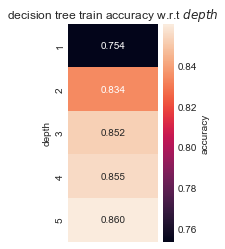

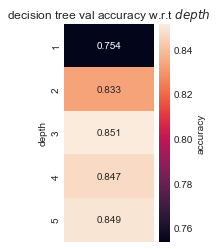

Test Accuracy for Decision Tree =  0.855


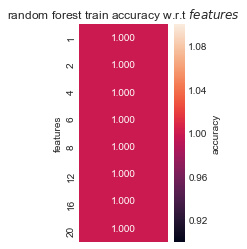

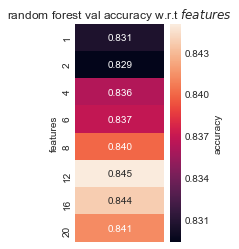

Test Accuracy for Random Forest =  0.8225


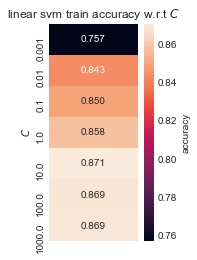

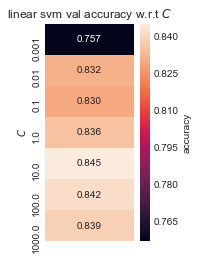

Test Accuracy for Linear SVM =  0.8175


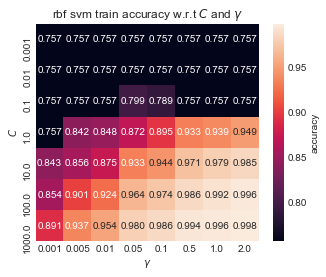

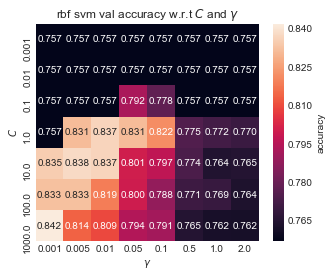

Test Accuracy for RBF SVM =  0.8225


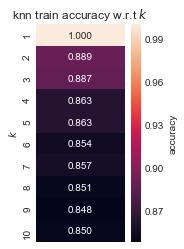

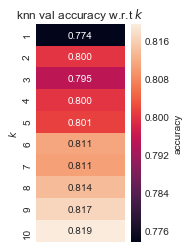

Test Accuracy for K Nearest Neighbors =  0.8


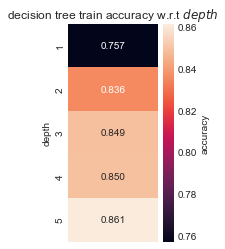

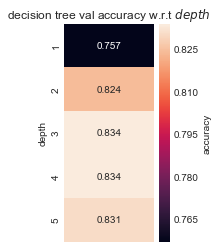

Test Accuracy for Decision Tree =  0.8625


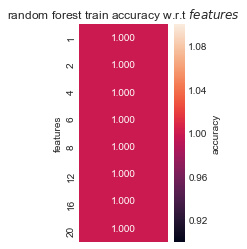

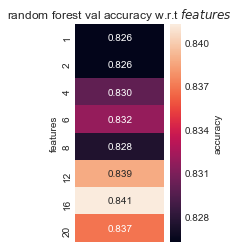

Test Accuracy for Random Forest =  0.835
Train Partition:  0.5


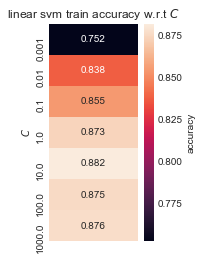

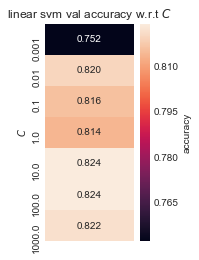

Test Accuracy for Linear SVM =  0.846


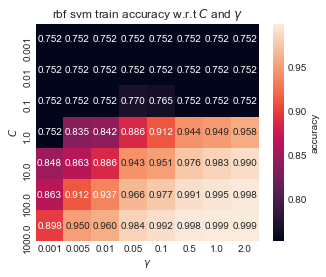

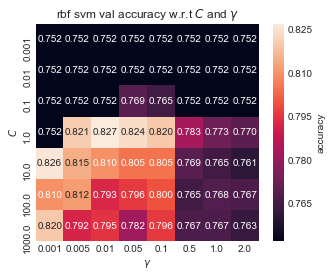

Test Accuracy for RBF SVM =  0.827


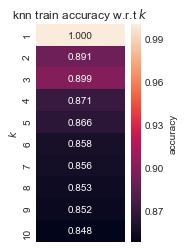

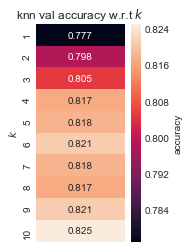

Test Accuracy for K Nearest Neighbors =  0.821


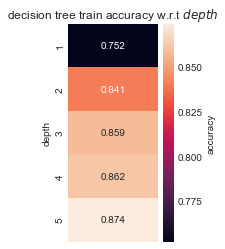

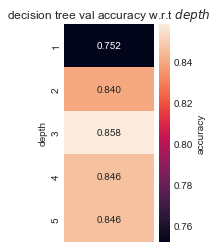

Test Accuracy for Decision Tree =  0.846


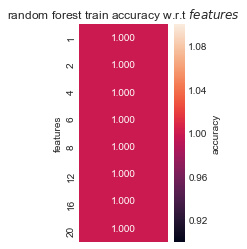

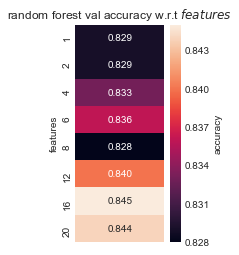

Test Accuracy for Random Forest =  0.823


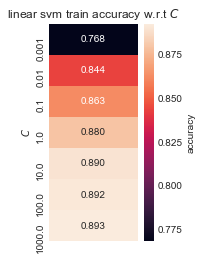

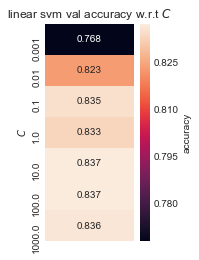

Test Accuracy for Linear SVM =  0.831


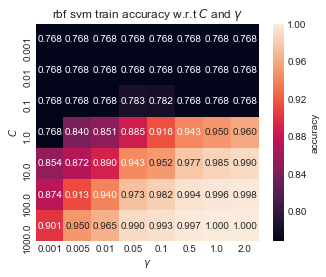

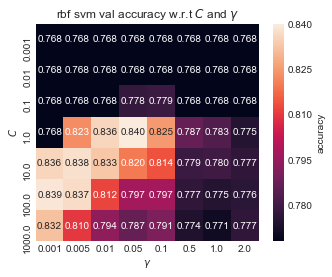

Test Accuracy for RBF SVM =  0.806


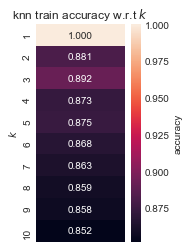

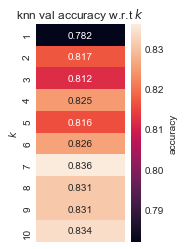

Test Accuracy for K Nearest Neighbors =  0.816


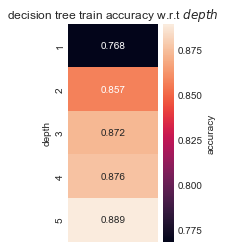

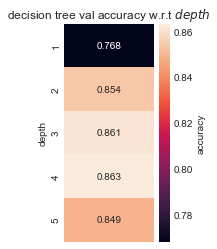

Test Accuracy for Decision Tree =  0.834


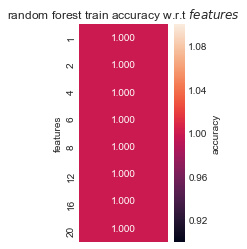

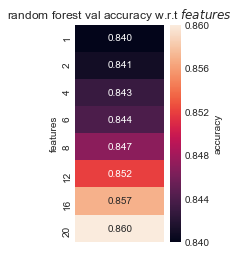

Test Accuracy for Random Forest =  0.828


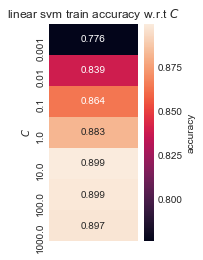

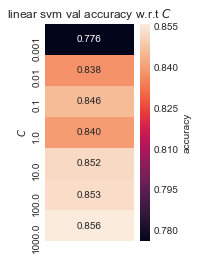

Test Accuracy for Linear SVM =  0.816


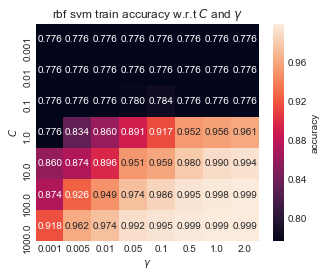

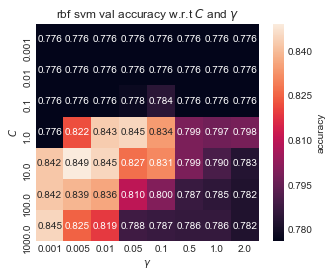

Test Accuracy for RBF SVM =  0.808


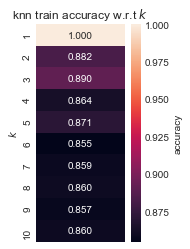

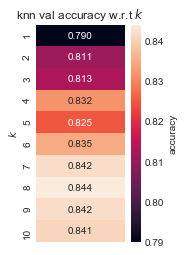

Test Accuracy for K Nearest Neighbors =  0.815


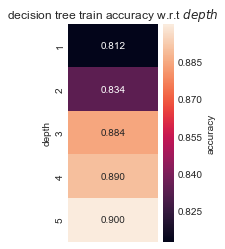

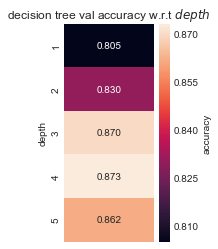

Test Accuracy for Decision Tree =  0.825


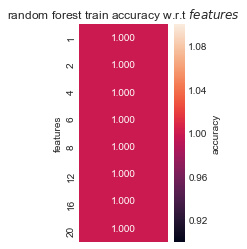

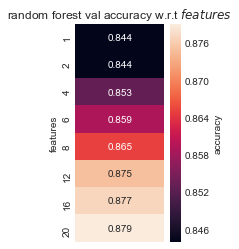

Test Accuracy for Random Forest =  0.819
Train Partition:  0.2


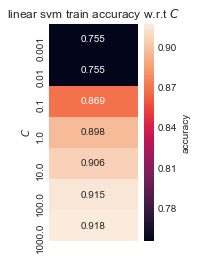

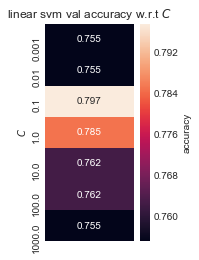

Test Accuracy for Linear SVM =  0.816875


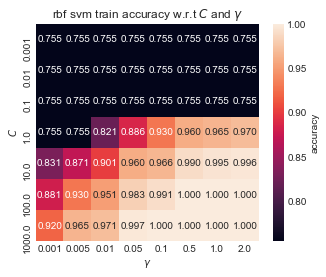

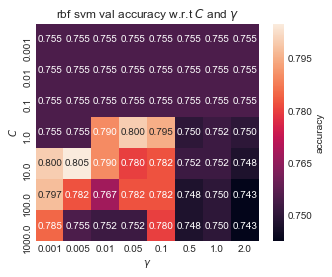

Test Accuracy for RBF SVM =  0.816875


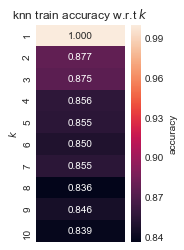

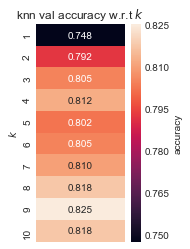

Test Accuracy for K Nearest Neighbors =  0.8175


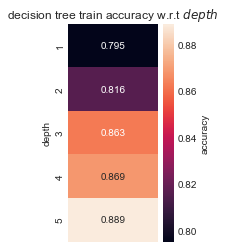

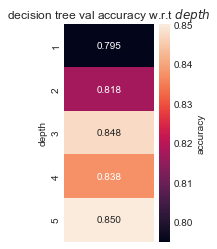

Test Accuracy for Decision Tree =  0.82375


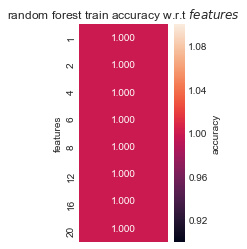

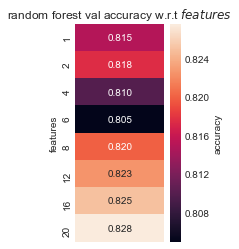

Test Accuracy for Random Forest =  0.825625


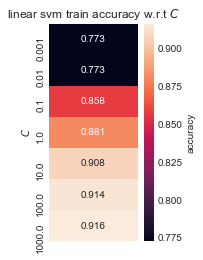

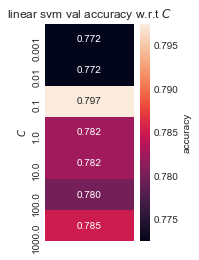

Test Accuracy for Linear SVM =  0.813125


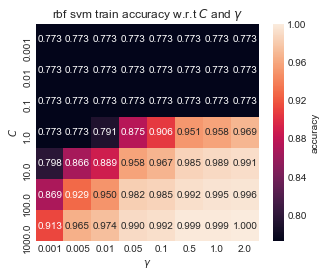

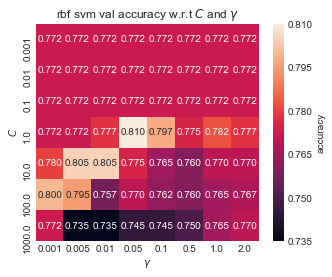

Test Accuracy for RBF SVM =  0.82


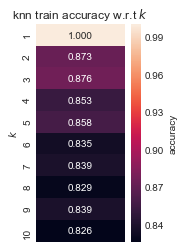

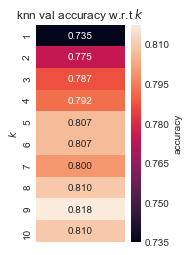

Test Accuracy for K Nearest Neighbors =  0.810625


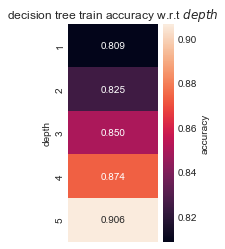

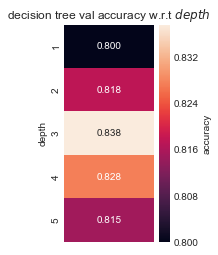

Test Accuracy for Decision Tree =  0.844375


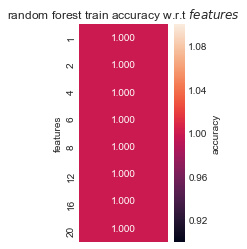

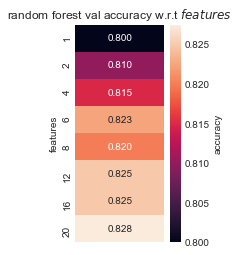

Test Accuracy for Random Forest =  0.808125


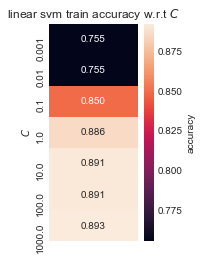

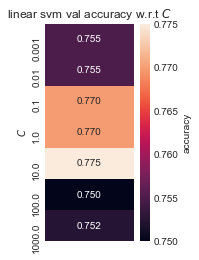

Test Accuracy for Linear SVM =  0.836875


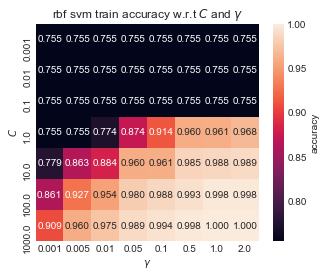

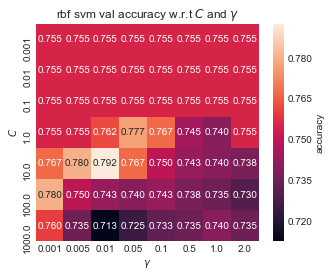

Test Accuracy for RBF SVM =  0.829375


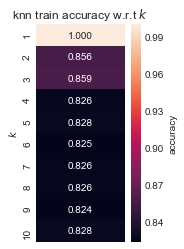

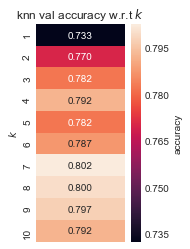

Test Accuracy for K Nearest Neighbors =  0.823125


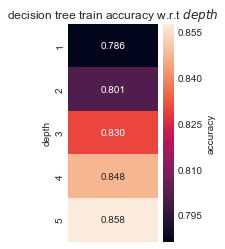

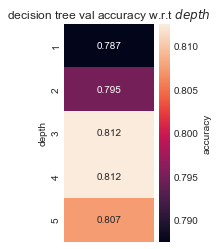

Test Accuracy for Decision Tree =  0.854375


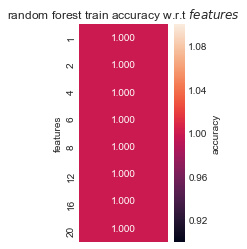

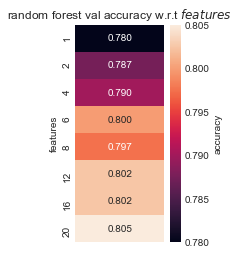

Test Accuracy for Random Forest =  0.83


In [29]:
# different train/test partitions 
partitions = [0.8,0.5,0.2]
test_acc_arr = np.zeros((3,5))
train_acc_arr = np.zeros((3,5))
val_acc_arr = np.zeros((3,5))
param_arr = np.zeros((9,6))

# shuffle the data
X_and_Y = adult_dataset.sample(frac=1)

X_and_Y = X_and_Y.iloc[:2000]

# iterate through the different splits 
for i, partition in enumerate(partitions):
    print("Train Partition: ", partition)
    linear_svm_test_acc = []
    rbf_svm_test_acc = []
    knn_test_acc = []
    decision_tree_test_acc = []
    random_forest_test_acc = []
    
    # do three trials for each classifier
    for trial in range(3):

        X_and_Y = X_and_Y.sample(frac=1)
        
        # take a portion of the data to run the classifier on as original data has too many rows
        X = X_and_Y.iloc[:, 0:-1] # First column to second last column: Features (numerical values) 
        Y = X_and_Y.iloc[:, -1] # make above 50k class variable (1 for income >50k, 0 otherwise)
        
        train_size = int(partition*len(X)) #Find the point where to partition the data
        
        X_train_val = X[:train_size]
        X_test      = X[train_size:]
        Y_train_val = Y[:train_size]
        Y_test      = Y[train_size:]
        
        # scale values from -1 to 1 
        scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train_val)
        X_train_val = scaling.transform(X_train_val)
        X_test = scaling.transform(X_test)
        
        # call each functionn and save the values returnred in appropriate arrays
        test_acc,best_train_0, best_val_0, param_0 = linearSVM()
        linear_svm_test_acc.append(test_acc)
        param_arr[i*3 + trial, 0] = param_0
        print("Test Accuracy for Linear SVM = ", test_acc)
        
        test_acc,best_train_1, best_val_1, param_1, param_2 = rbfSVM()
        rbf_svm_test_acc.append(test_acc)
        param_arr[i*3 + trial, 1] = param_1
        param_arr[i*3 + trial, 2] = param_2
        print("Test Accuracy for RBF SVM = ", test_acc)
        
        test_acc,best_train_2,best_val_2, param_3 = knn()
        knn_test_acc.append(test_acc)
        param_arr[i*3 + trial, 3] = param_3
        print("Test Accuracy for K Nearest Neighbors = ", test_acc)
        
        test_acc,best_train_3,best_val_3, param_4 = decisionTree()
        decision_tree_test_acc.append(test_acc)
        param_arr[i*3 + trial, 4] = param_4
        print("Test Accuracy for Decision Tree = ", test_acc)

        test_acc, best_train_4, best_val_4, param_5 = randomForest()
        random_forest_test_acc.append(test_acc)
        param_arr[i*3 + trial, 5] = param_5
        print("Test Accuracy for Random Forest = ", test_acc)

    
    # get the average accuracy over the three rounds for training, testing, and validation
    test_acc_arr[i, 0] = sum(linear_svm_test_acc)/3
    test_acc_arr[i, 1] = sum(rbf_svm_test_acc)/3
    test_acc_arr[i, 2] = sum(knn_test_acc)/3
    test_acc_arr[i, 3] = sum(decision_tree_test_acc)/3
    test_acc_arr[i, 4] = sum(random_forest_test_acc)/3

    train_acc_arr[i, 0] = best_train_0
    train_acc_arr[i, 1] = best_train_1
    train_acc_arr[i, 2] = best_train_2
    train_acc_arr[i, 3] = best_train_3
    train_acc_arr[i, 4] = best_train_4

    val_acc_arr[i, 0] = best_val_0
    val_acc_arr[i, 1] = best_val_1
    val_acc_arr[i, 2] = best_val_2
    val_acc_arr[i, 3] = best_val_3
    val_acc_arr[i, 4] = best_val_4

In [30]:
train_df = pd.DataFrame(train_acc_arr)
train_df.columns = ['Linear SVM', 'RBF SVM', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest']
train_df.index.name = 'Train Partition'
train_df.rename(index = {0: "80", 1:"50",2 : "20"},inplace = True)
train_df

,Linear SVM,RBF SVM,K Nearest Neighbors,Decision Tree,Random Forest
Train Partition,,,,,
80,0.870626,0.890937,0.850004,0.849071,1.0
50,0.897499,0.873501,0.860005,0.889996,1.0
20,0.891258,0.883786,0.826245,0.830013,1.0


In [31]:
val_df = pd.DataFrame(val_acc_arr)
val_df.columns = ['Linear SVM', 'RBF SVM', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest']
val_df.index.name = 'Train Partition'
val_df.rename(index = {0: "80", 1:"50",2 : "20"},inplace = True)
val_df

,Linear SVM,RBF SVM,K Nearest Neighbors,Decision Tree,Random Forest
Train Partition,,,,,
80,0.845,0.841875,0.819375,0.83375,0.84125
50,0.856,0.849000,0.844000,0.87300,0.87900
20,0.775,0.792500,0.802500,0.81250,0.80500


In [32]:
test_df = pd.DataFrame(test_acc_arr)
test_df.columns = ['Linear SVM', 'RBF SVM', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest']
test_df.index.name = 'Train Partition'
test_df.rename(index = {0: "80", 1:"50",2 : "20"},inplace = True)
test_df

,Linear SVM,RBF SVM,K Nearest Neighbors,Decision Tree,Random Forest
Train Partition,,,,,
80,0.829167,0.841667,0.813333,0.852500,0.830000
50,0.831000,0.813667,0.817333,0.835000,0.823333
20,0.822292,0.822083,0.817083,0.840833,0.821250


In [33]:
param_df = pd.DataFrame(param_arr)
param_df.columns = ['C-Linear SVM', 'C-RBF SVM', 'Gamma-RBF SVM','K-K Nearest Neighbors', 
                    'Depth-Decision Tree', 'Features-Random Forest']
param_df.index.name = 'Train Partition'
param_df.rename(index = {0: "80", 1:"80",2 : "80", 3: "50", 4:"50", 5: "50", 6: "20", 7:"20", 8: "20"},inplace = True)
param_df

,C-Linear SVM,C-RBF SVM,Gamma-RBF SVM,K-K Nearest Neighbors,Depth-Decision Tree,Features-Random Forest
Train Partition,,,,,,
80,10.0,1000.0,0.001,7.0,3.0,16.0
80,1000.0,1000.0,0.001,4.0,3.0,12.0
80,10.0,1000.0,0.001,10.0,3.0,16.0
50,10.0,1.0,0.010,10.0,3.0,16.0
50,10.0,1.0,0.050,7.0,4.0,20.0
50,1000.0,10.0,0.005,8.0,4.0,20.0
20,0.1,10.0,0.005,9.0,5.0,20.0
20,0.1,1.0,0.050,9.0,3.0,20.0
20,10.0,10.0,0.010,7.0,3.0,20.0
